Source [link](https://mikulskibartosz.name/outlier-detection-with-scikit-learn-d9246b33d352)

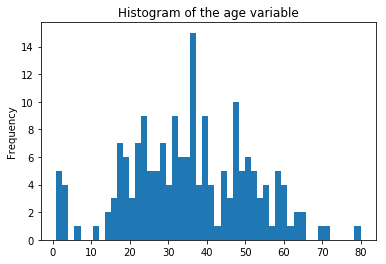

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
titanic = sns.load_dataset('titanic')

titanic = titanic.copy()
titanic = titanic.dropna()

titanic['age'].plot.hist(
  bins = 50,
  title = "Histogram of the age variable"
)

# Z-Score

In [4]:
from scipy.stats import zscore

titanic["age_zscore"] = zscore(titanic["age"])

titanic["is_outlier"] = titanic["age_zscore"].apply(
  lambda x: x <= -2.5 or x >= 2.5
)
titanic[titanic["is_outlier"]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_zscore,is_outlier
630,1,1,male,80.0,0,0,30.0,S,First,man,True,A,Southampton,yes,True,2.83948,True


# DBSCAN — Density-Based Spatial Clustering of Applications with Noise

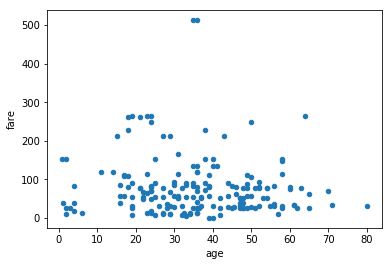

In [5]:
ageAndFare = titanic[["age", "fare"]]
ageAndFare.plot.scatter(x = "age", y = "fare")

Scaling is needed
> We also see that both variables have different scales.

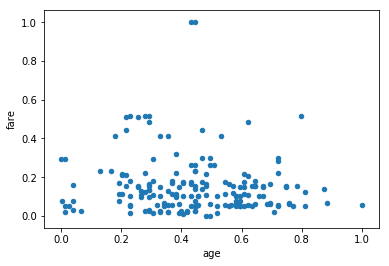

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ageAndFare = scaler.fit_transform(ageAndFare)
ageAndFare = pd.DataFrame(ageAndFare, columns = ["age", "fare"])
ageAndFare.plot.scatter(x = "age", y = "fare")

In [22]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(
  eps = 0.5,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)
model = dbscan.fit(ageAndFare)

labels = model.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

# Core samples

In [27]:
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscan.core_sample_indices_] = True
core_samples

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# Number of clusters

In [33]:
len(set(labels) - set([-1]))

1

# Evaluation

## Silhouette Score:
between [-1, 1].
>  a cluster with a lot of data points very close to each other (high density) AND is far away from the next nearest cluster (suggesting the cluster is very unique in comparison to the next closest), will have a strong silhouette 

In [34]:
from sklearn import metrics
metrics.silhouette_score(ageAndFare, labels)

0.6666422095952521

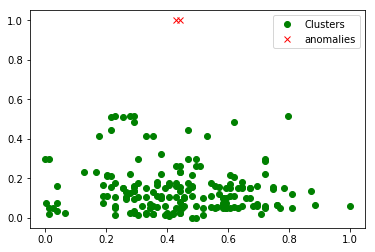

In [52]:
plt.plot(ageAndFare[labels > -1].age, ageAndFare[labels > -1].fare, 'go')
plt.plot(ageAndFare[labels == -1].age, ageAndFare[labels == -1].fare, 'rx')
plt.legend(["Clusters", "anomalies"])